<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/Project/MobileGame/4.ab_test_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B 테스트

In [20]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [21]:
ab = pd.read_csv('/content/drive/MyDrive/MobileGame/ab_campaign.csv')

# KPI: installs, revenue
group_A = ab[ab['ad_group']=='A']
group_B = ab[ab['ad_group']=='B']

In [22]:
revenue_A = group_A['revenue'].iloc[0]
revenue_B = group_B['revenue'].iloc[0]

print(f"Group A 매출: {revenue_A}")
print(f"Group B 매출: {revenue_B}")

diff_revenue = revenue_B - revenue_A
percent_change = (diff_revenue / revenue_A) * 100

print(f"매출액 차이 (B - A): {diff_revenue}")
print(f"매출액 증가율 (B vs A): {percent_change:.2f}%")

Group A 매출: 1000
Group B 매출: 1300
매출액 차이 (B - A): 300
매출액 증가율 (B vs A): 30.00%


In [23]:
# 그룹별 유저 수 (임의)
num_A = 200
num_B = 250

# 기존 revenue를 참고해서 유저 단위 revenue 생성 (정규분포 활용)
np.random.seed(42)
revenue_A = np.random.normal(loc=ab.loc[0, 'revenue']/num_A, scale=2, size=num_A)
revenue_B = np.random.normal(loc=ab.loc[1, 'revenue']/num_B, scale=2, size=num_B)

# 유저 단위 데이터프레임 생성
ab_users = pd.DataFrame({
    'ad_group': ['A']*num_A + ['B']*num_B,
    'revenue': np.concatenate([revenue_A, revenue_B])
})
# 확인
print(ab_users.head())
print(ab_users['ad_group'].value_counts())

  ad_group   revenue
0        A  5.993428
1        A  4.723471
2        A  6.295377
3        A  8.046060
4        A  4.531693
ad_group
B    250
A    200
Name: count, dtype: int64


In [24]:

group_A = ab_users[ab_users['ad_group']=='A']['revenue']
group_B = ab_users[ab_users['ad_group']=='B']['revenue']

t_stat, p_val = ttest_ind(group_A, group_B)
print(f"T-test 결과: t={t_stat:.2f}, p={p_val:.3f}")

T-test 결과: t=-2.17, p=0.031


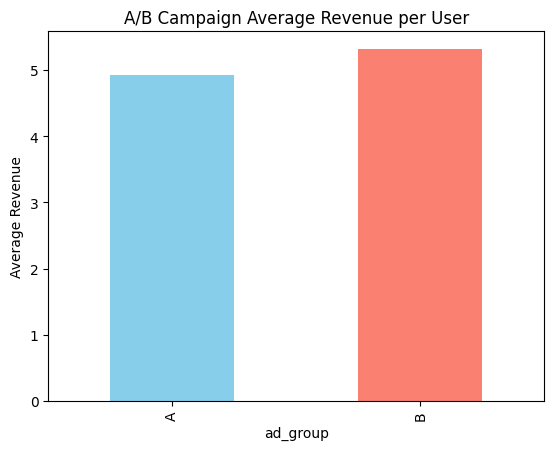

In [25]:
# 시각화
ab_users.groupby('ad_group')['revenue'].mean().plot(kind='bar', color=['skyblue','salmon'])
plt.title("A/B Campaign Average Revenue per User")
plt.ylabel("Average Revenue")
plt.show()

- 그룹 B가 그룹 A 대비 약 30% 높은 수익 달성
- p-value가 0.05 미만으로 통계적 유의성 확보
- 향후 광고 예산을 그룹 B 캠페인으로 집중 고려 가능